In [19]:
import numpy as np
import gstools as gs
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#parameters
nx = 181
ny = 181
nvz = 1
dx = 0.168
dy = 0.168
nphip = 100

#parameters related to v2
v_x = v_y = 0.01
v_var = 0.01
len_scale_v2 = 2

len_scale_psi = 4

Text(599.4818181818181, 0.5, 'y [fm]')

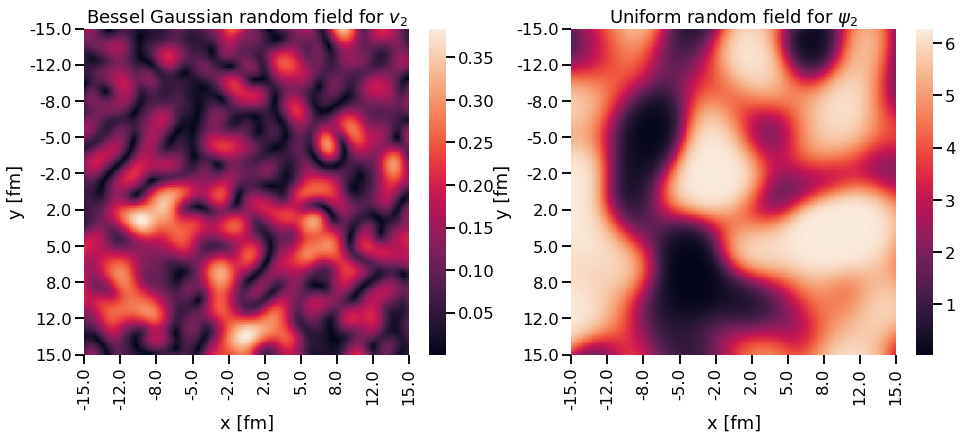

In [151]:
# the grid
sns.set_context('talk')
x = np.linspace(0,dx*nx,nx)
y = np.linspace(0,dy*ny,ny)

# a smooth Gaussian covariance model
model = gs.Gaussian(dim=2, var=v_var, len_scale=len_scale)
model_psi = gs.Gaussian(dim=2, var=v_var, len_scale=len_scale_psi)
srfx = gs.SRF(model, mean=v_x, generator="RandMeth")
srfy = gs.SRF(model, mean=v_y, generator="RandMeth")
srfpsi = gs.SRF(model_psi, mean=v_x, generator="RandMeth")

fieldx=srfx((x, y), mesh_type="structured")
fieldy=srfy((x, y), mesh_type="structured")
field_psi_gauss = srfpsi((x, y), mesh_type="structured")
# add two gaussian random fields in quadrature and take the squre root
# this distribution would be a bessel-gaussian distribution
fieldv= np.sqrt(np.square(fieldx)+np.square(fieldy))

fig, axs = plt.subplots(1,2,figsize=(16,6))
ax=axs[0]
ax = sns.heatmap(data=fieldv, ax=ax)
ax.set_title('Bessel Gaussian random field for $v_2$')
tick_labels = np.linspace(-15, 15,10)
ticks = np.linspace(0,nx,10)
ax.set_xticks(ticks)
ax.set_xticklabels(np.round(tick_labels))
ax.set_yticks(ticks)
ax.set_yticklabels(np.round(tick_labels))
ax.set_xlabel('x [fm]')
ax.set_ylabel('y [fm]')

#psi uniform random field
ax=axs[1]

fieldpsi=np.pi*2*gs.transform.normal_to_uniform(fld=srfpsi)
ax = sns.heatmap(data=fieldpsi, ax=ax)
ax.set_title('Uniform random field for $\psi_2$')
tick_labels = np.linspace(-15, 15,10)
ticks = np.linspace(0,nx,10)
ax.set_xticks(ticks)
ax.set_xticklabels(np.round(tick_labels))
ax.set_yticks(ticks)
ax.set_yticklabels(np.round(tick_labels))
ax.set_xlabel('x [fm]')
ax.set_ylabel('y [fm]')
#srfx.plot()
#srfy.plot()